<a href="https://colab.research.google.com/github/MatthewK84/LinkedIn-Learning-Journey/blob/main/ARXIV_Time_Series_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arxiv --user

In [1]:
import pandas as pd
import arxiv

In [2]:
# i only use these if I want to remove annoying deprecation warnings from my analysis
import warnings
warnings.filterwarnings('ignore')

In [3]:
def search_arxiv(query, max_results=10):

    data = {}
    i = 0

    search = arxiv.Search(query=query, max_results=max_results)

    for result in search.results():

        try:

            data[i] = {}

            data[i]['title'] = result.title
            data[i]['date_published'] = result.published
            data[i]['authors'] = [a.name for a in result.authors]
            data[i]['summary'] = result.summary
            data[i]['url'] = result.pdf_url
            data[i]['category'] = result.primary_category

        except:

            print('weird arxiv error')

        # there are more fields that can be added; add as many as you need

        i += 1

    df = pd.DataFrame(data).T
    df = df[['date_published', 'title', 'authors', 'summary', 'url', 'category']]
    df['date_published'] = pd.to_datetime(df['date_published'])
    df.sort_values('date_published', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [4]:
# at 1000 articles, it takes about 30 seconds
# at 10000 articles, it takes a while; put laptop down and walk away
# i haven't tried beyond 10000 yet

# at the moment, this is finicky beyond 10000; needs debugged or something
# could also be a problem with the arxiv library as it seems to be inside the search

# so far, i haven't noticed obvious throttling, but possibly throttling is causing the issue

query = 'Time Series'

max_results = 5100

df = search_arxiv(query, max_results)
df.head()

,date_published,title,authors,summary,url,category
0,2023-11-06 17:52:08+00:00,TS-Diffusion: Generating Highly Complex Time S...,[Yangming Li],While current generative models have achieved ...,http://arxiv.org/pdf/2311.03303v1,cs.LG
1,2023-11-06 15:32:50+00:00,Few-shot Learning using Data Augmentation and ...,"[Hao Zhang, Zhendong Pang, Jiangpeng Wang, Ten...",Deep neural networks (DNNs) that tackle the ti...,http://arxiv.org/pdf/2311.03194v1,cs.CV
2,2023-11-06 05:01:58+00:00,Dynamic Neural Fields for Learning Atlases of ...,"[Zeen Chi, Zhongxiao Cong, Clinton J. Wang, Yi...",We present a method for fast biomedical image ...,http://arxiv.org/pdf/2311.02874v1,eess.IV
3,2023-11-05 04:27:24+00:00,Time Series Synthesis Using the Matrix Profile...,"[Audrey Der, Chin-Chia Michael Yeh, Yan Zheng,...",Publishing and sharing data is crucial for the...,http://arxiv.org/pdf/2311.02563v1,cs.DB
4,2023-11-05 04:21:42+00:00,Ego-Network Transformer for Subsequence Classi...,"[Chin-Chia Michael Yeh, Huiyuan Chen, Yujie Fa...",Time series classification is a widely studied...,http://arxiv.org/pdf/2311.02561v1,cs.LG


In [5]:
df.shape

(5100, 6)

In [6]:
outfile = '/content/sample_data/arxix_time_series_data.csv'

df.to_csv(outfile, index=False)

In [7]:
Time_Series = pd.read_csv('/content/sample_data/arxix_time_series_data.csv')
Time_Series.head()

,date_published,title,authors,summary,url,category
0,2023-11-06 17:52:08+00:00,TS-Diffusion: Generating Highly Complex Time S...,['Yangming Li'],While current generative models have achieved ...,http://arxiv.org/pdf/2311.03303v1,cs.LG
1,2023-11-06 15:32:50+00:00,Few-shot Learning using Data Augmentation and ...,"['Hao Zhang', 'Zhendong Pang', 'Jiangpeng Wang...",Deep neural networks (DNNs) that tackle the ti...,http://arxiv.org/pdf/2311.03194v1,cs.CV
2,2023-11-06 05:01:58+00:00,Dynamic Neural Fields for Learning Atlases of ...,"['Zeen Chi', 'Zhongxiao Cong', 'Clinton J. Wan...",We present a method for fast biomedical image ...,http://arxiv.org/pdf/2311.02874v1,eess.IV
3,2023-11-05 04:27:24+00:00,Time Series Synthesis Using the Matrix Profile...,"['Audrey Der', 'Chin-Chia Michael Yeh', 'Yan Z...",Publishing and sharing data is crucial for the...,http://arxiv.org/pdf/2311.02563v1,cs.DB
4,2023-11-05 04:21:42+00:00,Ego-Network Transformer for Subsequence Classi...,"['Chin-Chia Michael Yeh', 'Huiyuan Chen', 'Yuj...",Time series classification is a widely studied...,http://arxiv.org/pdf/2311.02561v1,cs.LG


In [8]:
Time_Series['category'].value_counts()

cs.LG              1446
stat.ME             482
math.ST             264
stat.ML             248
physics.data-an     177
                   ... 
cs.PF                 1
math.SG               1
cs.GL                 1
math.GT               1
q-bio.SC              1
Name: category, Length: 140, dtype: int64

In [9]:
import csv

# The path to the CSV file
input_file_path = '/content/sample_data/arxix_time_series_data.csv'
output_file_path = '/content/sample_data/time_series_filtered.csv'


# List of categories to include
included_categories = ['cs.LG', 'stat.ME', 'math.ST', 'stat.ML']

# Read the CSV file and filter rows
with open(input_file_path, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    fieldnames = reader.fieldnames  # Capture the fieldnames for writing

    # Write the filtered rows to a new CSV file
    with open(output_file_path, mode='w', newline='', encoding='utf-8') as outfile:
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()  # Write the header to the output file

        for row in reader:
            # Check if the 'category' is in the list of included categories
            if row['category'] in included_categories:
                writer.writerow(row)

In [10]:
Time_Series_Final = pd.read_csv('/content/sample_data/time_series_filtered.csv')
Time_Series_Final.head()

,date_published,title,authors,summary,url,category
0,2023-11-06 17:52:08+00:00,TS-Diffusion: Generating Highly Complex Time S...,['Yangming Li'],While current generative models have achieved ...,http://arxiv.org/pdf/2311.03303v1,cs.LG
1,2023-11-05 04:21:42+00:00,Ego-Network Transformer for Subsequence Classi...,"['Chin-Chia Michael Yeh', 'Huiyuan Chen', 'Yuj...",Time series classification is a widely studied...,http://arxiv.org/pdf/2311.02561v1,cs.LG
2,2023-11-04 02:07:47+00:00,Successive Model-Agnostic Meta-Learning for Fe...,"['Hai Su', 'Jiajun Hu', 'Songsen Yu']",Meta learning is a promising technique for sol...,http://arxiv.org/pdf/2311.02300v1,cs.LG
3,2023-11-02 17:58:09+00:00,Time Series Anomaly Detection using Diffusion-...,"['Ioana Pintilie', 'Andrei Manolache', 'Florin...",Diffusion models have been recently used for a...,http://arxiv.org/pdf/2311.01452v1,cs.LG
4,2023-11-02 17:55:41+00:00,Deep Double Descent for Time Series Forecastin...,"['Valentino Assandri', 'Sam Heshmati', 'Burhan...","Deep learning models, particularly Transformer...",http://arxiv.org/pdf/2311.01442v1,cs.LG


In [11]:
Time_Series_Final.shape

(2440, 6)

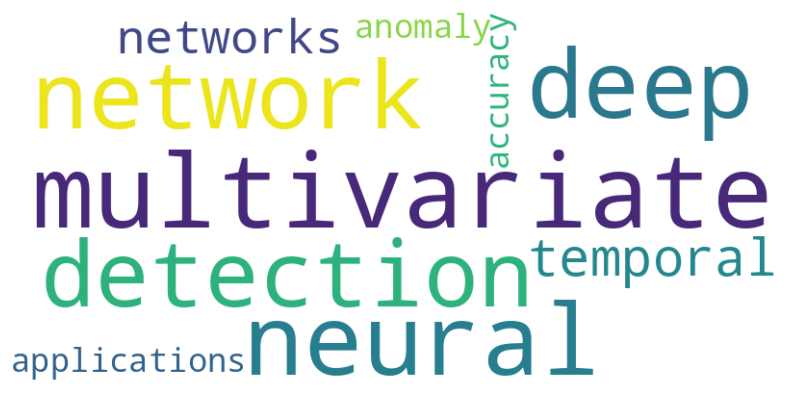

In [18]:
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# The path to the CSV file
input_file_path = '/content/sample_data/time_series_filtered.csv'

# Common English stop words
stop_words = set(['as','is','a','are','it','paper','based','proposed', 'an','approach', 'using', 'time-series', 'learning', 'performance', 'results', 'these', 'show', 'have', 'has','datasets','propose','classification','two','also','used','different','analysis','problem','new','framework', 'novel','been','demonstrate',
                  'that', 'this', 'be', 'which', 'proposed', 'time', 'data', 'method', 'methods', 'our', 'we', 'series', 'forecasting', 'model', 'models', 'the', 'model', 'and', 'or', 'but', 'if', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'many', 'however', 'existing', 'its', 'prediction', 'application',
                  'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'])

# Initialize a Counter for word frequencies
word_freq = Counter()

# Read the CSV file and process the 'summary' column
with open(input_file_path, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        summary = row['summary']
        # Tokenize the summary text
        words = summary.split()
        # Filter out stop words and count word frequencies
        for word in words:
            word = word.lower().rstrip('.!,')
            if word not in stop_words:
                word_freq[word] += 1

# Select the ten most common words
most_common_words = word_freq.most_common(10)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(most_common_words))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

In [43]:
import pandas as pd

# Sample lists of Foundation and Advanced Methods
Foundation_keywords = ['ARIMA', 'SAMIRA', 'LSTM', 'Conformal Prediction', 'multivariate time series', 'vector autoregression']
Advanced_Methods_keywords = ['Transformer', 'GAN', 'EDAIN', 'MLP', 'deep learning', 'neural networks', 'supervised learning']

# Function to analyze sentiment based on word lists
def simple_sentiment_analysis(text):
    # Tokenize the text by words and convert to lower case
    words = text.lower().split()
    # Count the number of Foundation and Advanced Methods words in the text
    foundation_count = sum(words.count(word) == 1 for word in Foundation_keywords)
    advanced_methods_count = sum(words.count(word) == 1 for word in Advanced_Methods_keywords)
    # Determine the sentiment based on the counts
    if foundation_count >= advanced_methods_count:
        return 'Foundation'
    elif advanced_methods_count <= foundation_count:
        return 'Advanced Methods'
    else:
        return 'Mixed'

# Load the sample CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/time_series_filtered.csv')

# Apply the simple sentiment analysis to each summary
df['sentiment_interpretation'] = df['summary'].apply(simple_sentiment_analysis)

# Show the DataFrame with the sentiment analysis
df[['date_published', 'summary', 'sentiment_interpretation']]

,date_published,summary,sentiment_interpretation
0,2023-11-06 17:52:08+00:00,While current generative models have achieved ...,Foundation
1,2023-11-05 04:21:42+00:00,Time series classification is a widely studied...,Foundation
2,2023-11-04 02:07:47+00:00,Meta learning is a promising technique for sol...,Foundation
3,2023-11-02 17:58:09+00:00,Diffusion models have been recently used for a...,Foundation
4,2023-11-02 17:55:41+00:00,"Deep learning models, particularly Transformer...",Foundation
...,...,...,...
2435,2006-01-04 16:29:30+00:00,"We consider a time series $X=\{X_k, k\in\mathb...",Foundation
2436,2005-08-16 10:53:52+00:00,We consider a time series model involving a fr...,Foundation
2437,2005-05-25 04:46:35+00:00,zoo is an R package providing an S3 class with...,Foundation
2438,2005-05-10 10:01:59+00:00,We consider the prediction problem of a contin...,Foundation
